In [25]:
import pandas as pd

In [26]:
a=pd.read_csv("shampoo-sales.csv")
a.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [27]:
dates = pd.date_range(start='1901-01-01', freq='MS', periods=len(a))

In [28]:
a['TimeIndex'] = pd.DataFrame(dates, columns=['Year'])
a.head(5)

,Month,Sales,TimeIndex
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


In [29]:
a.tail()

,Month,Sales,TimeIndex
31,3-08,407.6,1903-08-01
32,3-09,682.0,1903-09-01
33,3-10,475.3,1903-10-01
34,3-11,581.3,1903-11-01
35,3-12,646.9,1903-12-01


In [6]:
import calendar
a['Month'] = dates.month
a['Month'] = a['Month'].apply(lambda x: calendar.month_abbr[x])
a['Year'] = dates.year

In [8]:
a = a[['Month', 'Year', 'Sales']]

In [9]:
a.head()

,Month,Year,Sales
0,Jan,1901,266.0
1,Feb,1901,145.9
2,Mar,1901,183.1
3,Apr,1901,119.3
4,May,1901,180.3


In [53]:
a=a.set_index(dates)

In [54]:
a

,Month,Sales,TimeIndex
1901-01-01,1-01,266.0,1901-01-01
1901-02-01,1-02,145.9,1901-02-01
1901-03-01,1-03,183.1,1901-03-01
1901-04-01,1-04,119.3,1901-04-01
1901-05-01,1-05,180.3,1901-05-01
1901-06-01,1-06,168.5,1901-06-01
1901-07-01,1-07,231.8,1901-07-01
1901-08-01,1-08,224.5,1901-08-01
1901-09-01,1-09,192.8,1901-09-01
1901-10-01,1-10,122.9,1901-10-01


In [55]:
a.head()

,Month,Sales,TimeIndex
1901-01-01,1-01,266.0,1901-01-01
1901-02-01,1-02,145.9,1901-02-01
1901-03-01,1-03,183.1,1901-03-01
1901-04-01,1-04,119.3,1901-04-01
1901-05-01,1-05,180.3,1901-05-01


In [12]:
sales_ts = a['Sales']

In [13]:
a["Sales"]=a["Sales"].astype("int64")

In [14]:
a.head()

,Month,Year,Sales
1901-01-01,Jan,1901,266
1901-02-01,Feb,1901,145
1901-03-01,Mar,1901,183
1901-04-01,Apr,1901,119
1901-05-01,May,1901,180


In [56]:
train             = a[0:int(len(a)*0.7)] 
test              =a[int(len(a)*0.7):]

In [57]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing

In [58]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [59]:
model = SimpleExpSmoothing(np.asarray(train["Sales"]))

For alpha = 0.10,  RMSE is 244.8574 MAPE is 44.66


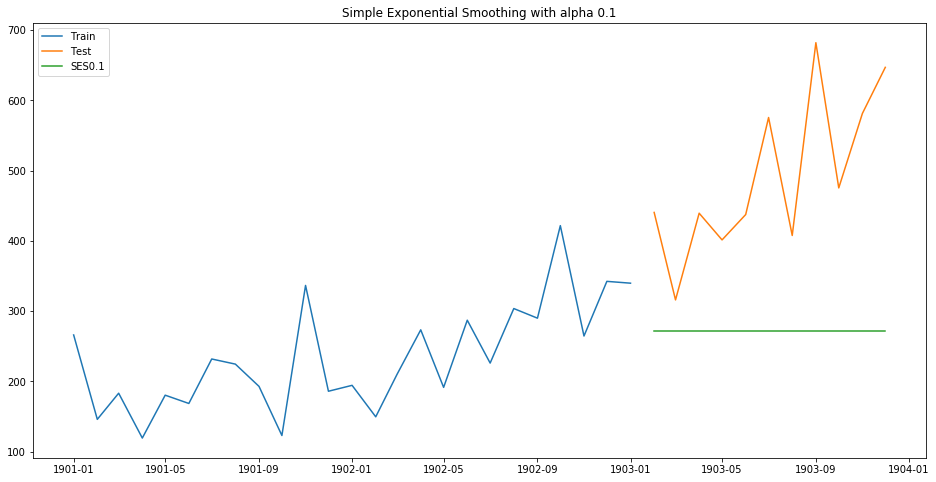

For alpha = 0.50,  RMSE is 192.4813 MAPE is 32.94


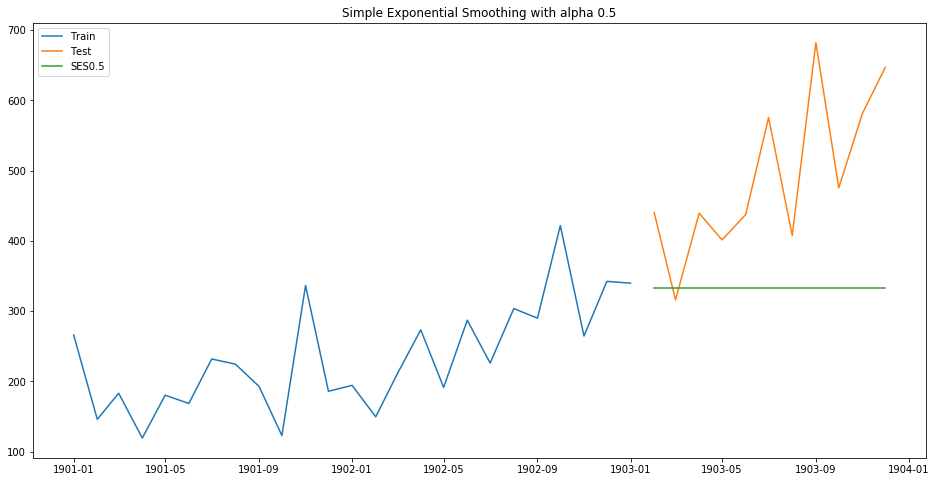

For alpha = 0.99,  RMSE is 186.4542 MAPE is 31.72


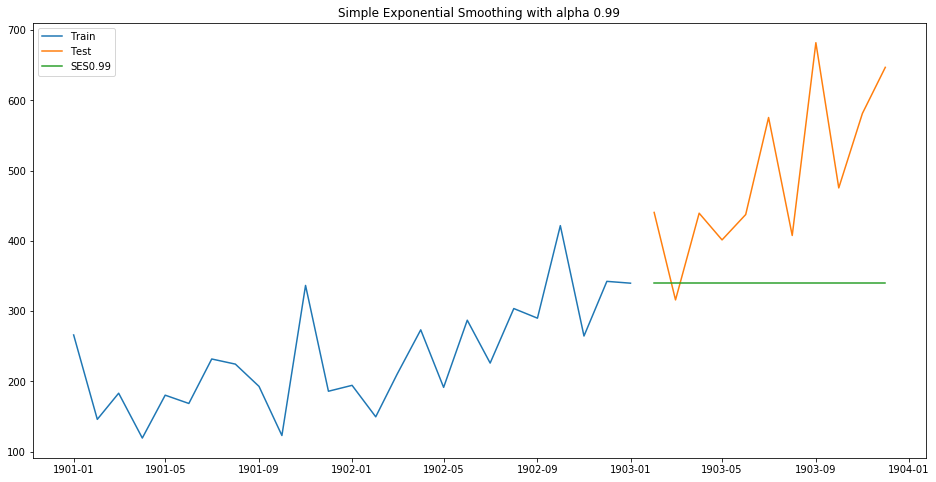

In [60]:
alpha_list = [0.1, 0.5, 0.99]

pred_SES  = test.copy() # Have a copy of the test dataset

for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Sales']))
    rmse                 =  np.sqrt(mean_squared_error(test['Sales'], pred_SES[alpha_str]))
    mape                 =  MAPE(test['Sales'],pred_SES[alpha_str])
###
    print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    plt.figure(figsize=(16,8))
    plt.plot(train.TimeIndex, train['Sales'], label ='Train')
    plt.plot(test.TimeIndex, test['Sales'], label  ='Test')
    plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

In [61]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [62]:
pred1 = ExponentialSmoothing(np.asarray(a['Sales']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months




== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.2105
Smoothing Slope:  0.2105
Smoothing Seasonal:  0.3684
Initial Level:  266.6667
Initial Slope:  5.5278
Initial Seasons:  [  -0.6667 -120.7667  -83.5667 -147.3667  -86.3667  -98.1667  -34.8667
  -42.1667  -73.8667 -143.7667   69.8333  -80.7667]



In [63]:
y_pred1 =  pred1.forecast(steps = 11)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Sales']})
print(df_pred1)

                 Y_hat      Y
1903-02-01  640.554146  440.4
1903-03-01  645.332960  315.9
1903-04-01  632.906377  439.3
1903-05-01  688.654589  401.3
1903-06-01  681.111179  437.4
1903-07-01  727.239368  575.5
1903-08-01  799.361673  407.6
1903-09-01  760.459244  682.0
1903-10-01  869.656328  475.3
1903-11-01  792.351692  581.3
1903-12-01  887.191823  646.9


In [64]:
import itertools

In [65]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [66]:
train_log=np.log10(train['Sales'])

In [67]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [68]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 model - AIC:-27.06643808651782


In [70]:
best_model = sm.tsa.statespace.SARIMAX(train_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [71]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   25
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                  16.036
Date:                            Mon, 20 May 2019   AIC                            -26.072
Time:                                    16:54:45   BIC                            -22.538
Sample:                                01-01-1901   HQIC                           -25.135
                                     - 01-01-1903                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6551      0.273     -2.400      0.016      -1.190      -0.120
ar.S.L12      -0.3821      0.257   

In [72]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1910-01-01'), dynamic=True, full_results=True)

In [73]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [74]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

In [75]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [76]:
testCopy

,Month,Sales,TimeIndex,sales_ts_forecasted
1903-02-01,3-02,440.4,1903-02-01,357.606242
1903-03-01,3-03,315.9,1903-03-01,314.005920
1903-04-01,3-04,439.3,1903-04-01,283.986610
1903-05-01,3-05,401.3,1903-05-01,325.391685
1903-06-01,3-06,437.4,1903-06-01,278.728506
1903-07-01,3-07,575.5,1903-07-01,305.374159
1903-08-01,3-08,407.6,1903-08-01,272.804026
1903-09-01,3-09,682.0,1903-09-01,277.659831
1903-10-01,3-10,475.3,1903-10-01,240.638468
1903-11-01,3-11,581.3,1903-11-01,287.560273


In [77]:
mse = ((testCopy['Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 234.935


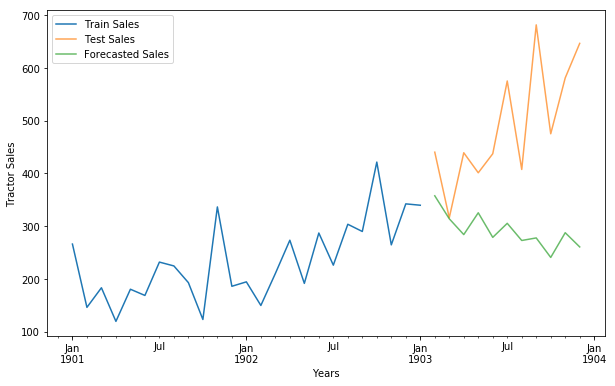

In [79]:
axis = train['Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [80]:
def MAE(y,yhat):
    diff = np.abs(np.array(y)-np.array(yhat))
    try:
        mae =  round(np.mean(np.fabs(diff)),3)
    except:
        print("Error while calculating")
        mae = np.nan
    return mae

In [81]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.mean(np.abs((y - yhat) / y)) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

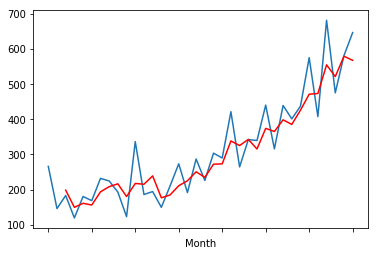

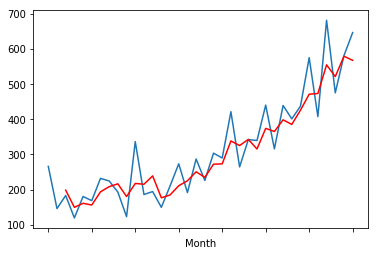

In [83]:
series       =  pd.read_csv("shampoo-sales.csv", 
                         header=0, index_col=0, parse_dates=True, squeeze=True) 

# tail rolling average transform
rolling      =  series.rolling(window = 3) # arbitrarily chosen

rolling_mean =  rolling.mean()
series.plot()

rolling_mean.plot(color = 'red')
plt.show()

# Zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color = 'red')
plt.show()

In [84]:
y_df = pd.DataFrame( {'Observed':series.values, 'Predicted':rolling_mean})
y_df .dropna(axis = 0, inplace = True)
print(y_df.tail())

rmse = np.sqrt(mean_squared_error(y_df.Observed, y_df.Predicted))
print("\n\n Accuracy measures ")
print('RMSE: %.3f' % rmse)
n = y_df.shape[0]

mae = MAE(y_df.Observed, y_df.Predicted)
print('MAE: %d' % np.float(mae))

mape = MAPE(y_df.Observed, y_df.Predicted)
print('MAPE: %.3f' % np.float(mape))

       Observed   Predicted
Month                      
3-08      407.6  473.500000
3-09      682.0  555.033333
3-10      475.3  521.633333
3-11      581.3  579.533333
3-12      646.9  567.833333


 Accuracy measures 
RMSE: 52.329
MAE: 41
MAPE: 14.210
